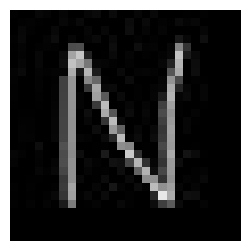

Image saved to C:\Users\halil/Desktop/image_raw.png


In [1]:
import mysql.connector
import config
import matplotlib.pyplot as plt
from PIL import Image
import io
import os

# Use the variables from config file
password = config.password

# Connect to MySQL and select the database
MyDB = mysql.connector.connect(
    host="localhost",
    user="root",
    password=password,
    database="culs"
)

MyCursor = MyDB.cursor()

def fetch_image_blob(image_id):
    SQLStatement = "SELECT Photo FROM Images WHERE id = %s"
    MyCursor.execute(SQLStatement, (image_id,))
    blob_data = MyCursor.fetchone()[0]
    return blob_data

def plot_image_from_blob(blob_data):
    # Convert blob data to PIL Image
    image = Image.open('image_raw.png')
    
    # Display the image using matplotlib
    plt.figure(figsize=(3,3))  # Adjust figure size as needed
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

def save_image_to_desktop(image_id):
    blob_data = fetch_image_blob(image_id)
    file_path = os.path.expanduser("~/Desktop/image_raw.png")  # Adjust the file path as needed
    with open(file_path, 'wb') as file:
        file.write(blob_data)
    print(f"Image saved to {file_path}")

# Example: Fetching and plotting the 10th image (image_id = 10)
image_id = 8
blob_data = fetch_image_blob(image_id)
plot_image_from_blob(blob_data)
save_image_to_desktop(image_id)